### 가우시안 분포 예제

In [2]:
%matplotlib inline

In [3]:
mu = 0
std = 1
rv = sp.stats.norm(mu, std)

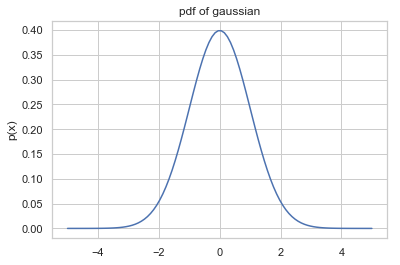

In [4]:
xx = np.linspace(-5, 5 , 100)
plt.plot(xx, rv.pdf(xx))
plt.ylabel("p(x)")
plt.title("pdf of gaussian")
plt.show()

In [5]:
np.random.seed(0)
x = rv.rvs(20)
x

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ,
        0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
        0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574])

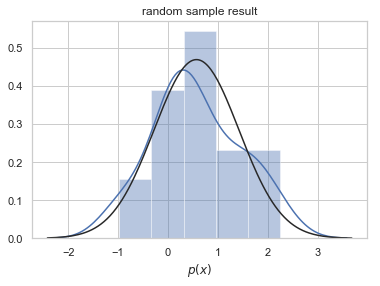

In [7]:
sns.distplot(x, kde=True, fit = sp.stats.norm)
plt.title("random sample result")
plt.xlabel("$p(x)$")
plt.show()

#### 1. Q-Q플롯

- Q-Q플롯은 분석하고자 하는 표본 데이터의 분포와 정규 분포의 분포 형태를 비교하여 표본 데이터가 정규 분포를 따르는지 검사하는 시각적 도구

In [8]:
x_sorted = np.sort(x) # 1. 표본 데이터를 정렬한다.
x_sorted

array([-0.97727788, -0.85409574, -0.20515826, -0.15135721, -0.10321885,
        0.12167502,  0.14404357,  0.3130677 ,  0.33367433,  0.40015721,
        0.4105985 ,  0.44386323,  0.76103773,  0.95008842,  0.97873798,
        1.45427351,  1.49407907,  1.76405235,  1.86755799,  2.2408932 ])

In [9]:
from scipy.stats.morestats import _calc_uniform_order_statistic_medians

In [11]:
position = _calc_uniform_order_statistic_medians(len(x))  # 2. 하나 하나의 표본데이터가 전체 데이터중 몇 %정도에 해당하는지 위치값을 구한다.
position

array([0.03406367, 0.08261724, 0.13172109, 0.18082494, 0.2299288 ,
       0.27903265, 0.32813651, 0.37724036, 0.42634422, 0.47544807,
       0.52455193, 0.57365578, 0.62275964, 0.67186349, 0.72096735,
       0.7700712 , 0.81917506, 0.86827891, 0.91738276, 0.96593633])

In [20]:
qf = rv.ppf(position)
qf

array([-1.8241636 , -1.38768012, -1.11829229, -0.91222575, -0.73908135,
       -0.5857176 , -0.44506467, -0.31273668, -0.18568928, -0.06158146,
        0.06158146,  0.18568928,  0.31273668,  0.44506467,  0.5857176 ,
        0.73908135,  0.91222575,  1.11829229,  1.38768012,  1.8241636 ])

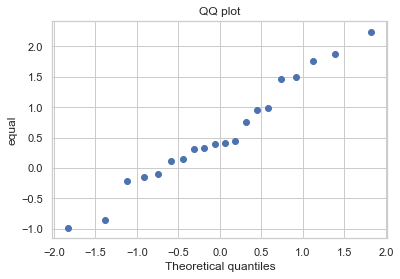

In [21]:
plt.scatter(qf, x_sorted)
plt.title("QQ plot")
plt.xlabel("Theoretical quantiles")
plt.ylabel("equal")
plt.show()

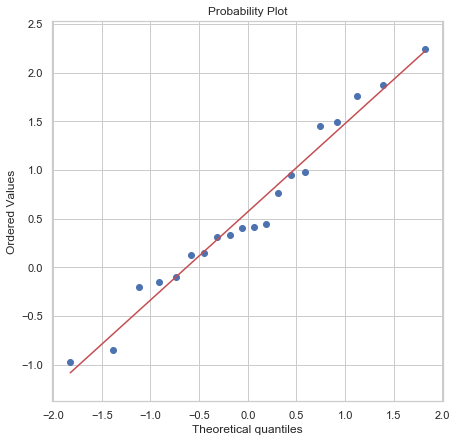

In [22]:
np.random.seed(0)
plt.figure(figsize=(7,7))
sp.stats.probplot(x, plot=plt)
plt.axis("equal")
plt.show()

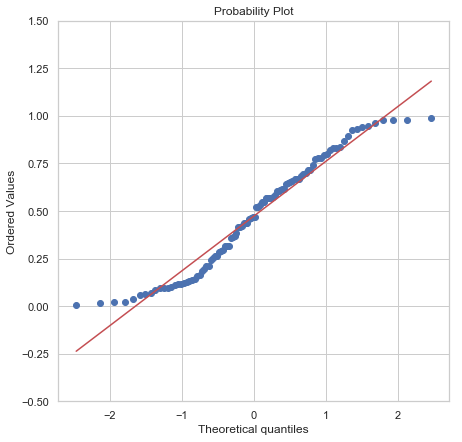

In [32]:
# 정규 분포를 따르지 않는 데이터 표본의 QQ 플롯

np.random.seed(0)
x = np.random.rand(100)
plt.figure(figsize=(7,7))
sp.stats.probplot(x, plot=plt)
plt.ylim(-0.5, 1.5)
plt.show()

#### 2. 중심극한 정리

- 여러변수의 합이 `정규분포`와 비슷한 분포를 이루는 현상
- 정규화된 표본평균의 분포는 N이 증가할 수록 표준 정규 분포에 수렴한다.

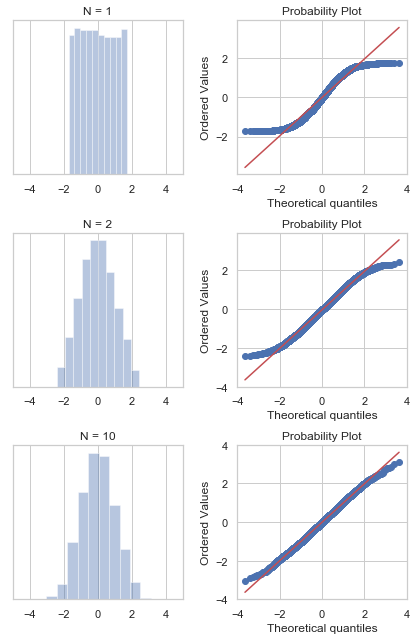

In [33]:
np.random.seed(0)
xx = np.linspace(-2, 2, 100)
plt.figure(figsize=(6,9))
for i, N in enumerate([1,2,10]):
    X = np.random.rand(5000, N)
    Xbar = (X.mean(axis=1) - 0.5) * np.sqrt(12*N)
    ax = plt.subplot(3,2,2*i+1)
    sns.distplot(Xbar, bins=10, kde=False, norm_hist=True)
    plt.xlim(-5,5)
    plt.yticks([])
    ax.set_title("N = {0}".format(N))
    plt.subplot(3,2,2*i+2)
    sp.stats.probplot(Xbar, plot=plt)

    
plt.tight_layout()
plt.show()

- 더하는 분포의 수가 10개 정도가 되면 그 합은 정규 분포에 상당히 가까워짐을 볼 수 있다.